# Load data

In [1]:
'''
Uncomment below to copy files to local HDFS.
Assumes that code lives in git directory and that data/ lives one level above
'''
# !hadoop fs -copyFromLocal ../data/ratings.csv /
# !hadoop fs -ls /
# !hadoop fs -cat /ratings.csv | head

copyFromLocal: `/ratings.csv': File exists
Found 2 items
-rw-r--r--   1 root supergroup    3038099 2022-04-28 22:17 /movies.csv
-rw-r--r--   1 root supergroup  678260987 2022-04-28 22:22 /ratings.csv
userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
1,665,5.0,1147878820
1,899,3.5,1147868510
1,1088,4.0,1147868495
1,1175,3.5,1147868826
1,1217,3.5,1147878326
1,1237,5.0,1147868839
cat: Unable to write to output stream.


### 2. Start Spark Session

In [2]:
# Change the number of cores in this code block
# by setting `spark.master` to `local[n]` where
# n is the number of cores
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

import matplotlib.pyplot as plt

conf = pyspark.SparkConf().setAll([('spark.master', 'local[2]'),
                                   ('spark.app.name', 'Basic Setup')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-04-28 23:42:11,413 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### 3. Load Data

Read data from the `ratings.csv` file

In [3]:
ratings_df = spark.read.option("header",True).csv("hdfs:///ratings.csv").cache()
ratings_df.printSchema()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)



In [4]:
ratings_df.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    296|   5.0|1147880044|
|     1|    306|   3.5|1147868817|
|     1|    307|   5.0|1147868828|
|     1|    665|   5.0|1147878820|
|     1|    899|   3.5|1147868510|
|     1|   1088|   4.0|1147868495|
|     1|   1175|   3.5|1147868826|
|     1|   1217|   3.5|1147878326|
|     1|   1237|   5.0|1147868839|
|     1|   1250|   4.0|1147868414|
|     1|   1260|   3.5|1147877857|
|     1|   1653|   4.0|1147868097|
|     1|   2011|   2.5|1147868079|
|     1|   2012|   2.5|1147868068|
|     1|   2068|   2.5|1147869044|
|     1|   2161|   3.5|1147868609|
|     1|   2351|   4.5|1147877957|
|     1|   2573|   4.0|1147878923|
|     1|   2632|   5.0|1147878248|
|     1|   2692|   5.0|1147869100|
+------+-------+------+----------+
only showing top 20 rows



In [5]:
ratings_df.groupBy('userID').count().sort(col("count").desc()).show()

2022-04-28 23:43:01,320 WARN memory.MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 54.6 MiB so far)
2022-04-28 23:43:01,327 WARN storage.BlockManager: Persisting block rdd_13_3 to disk instead.
2022-04-28 23:43:07,290 WARN memory.MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 6.6 MiB so far)


+------+-----+
|userID|count|
+------+-----+
| 72315|32202|
| 80974| 9178|
|137293| 8913|
| 33844| 7919|
| 20055| 7488|
|109731| 6647|
| 92046| 6564|
| 49403| 6553|
| 30879| 5693|
|115102| 5649|
|110971| 5633|
| 75309| 5525|
| 78849| 5276|
| 61010| 5244|
| 29803| 5219|
|122011| 5160|
| 57548| 5066|
| 93855| 5045|
|103611| 4861|
| 34987| 4831|
+------+-----+
only showing top 20 rows



In [6]:
ratings_df.groupBy('userID').count().describe().show()

2022-04-28 23:43:11,399 WARN memory.MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 22.6 MiB so far)
2022-04-28 23:43:12,216 WARN memory.MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 83.6 MiB so far)


+-------+------------------+------------------+
|summary|            userID|             count|
+-------+------------------+------------------+
|  count|            162541|            162541|
|   mean|           81271.0|153.80793153727367|
| stddev|46921.689389521205|    268.0475900845|
|    min|                 1|                20|
|    max|             99999|             32202|
+-------+------------------+------------------+



In [7]:
# Find median ratings for users
ratings_df.groupBy('userID').count().sort(col("count").desc()).approxQuantile("count", [0.5], 0.25)

2022-04-28 23:43:15,090 WARN memory.MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 83.9 MiB so far)
2022-04-28 23:43:15,919 WARN memory.MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 83.6 MiB so far)


[39.0]

In [8]:
r = ratings_df.groupBy('rating').count().sort(col("rating").asc())
r = r.toPandas()

2022-04-28 23:43:19,717 WARN memory.MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 83.9 MiB so far)
2022-04-28 23:43:20,238 WARN memory.MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 35.4 MiB so far)


In [9]:
r

,rating,count
0,0.5,393068
1,1.0,776815
2,1.5,399490
3,2.0,1640868
4,2.5,1262797
5,3.0,4896928
6,3.5,3177318
7,4.0,6639798
8,4.5,2200539
9,5.0,3612474


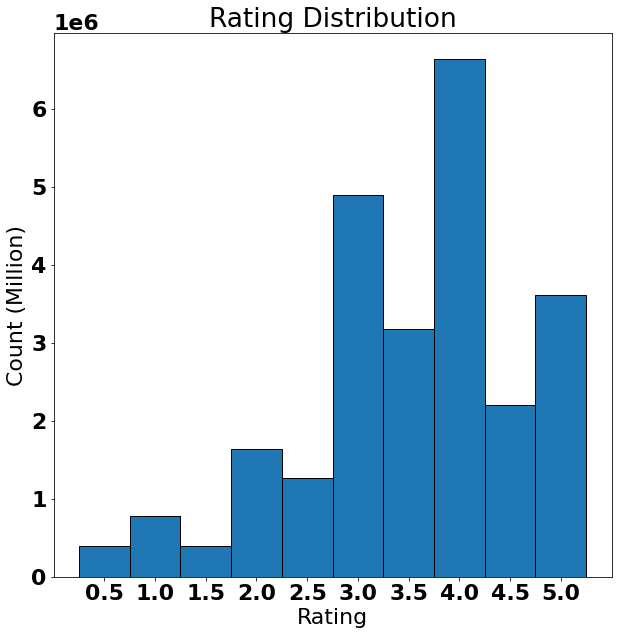

In [10]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.figure(figsize=(10,10))
plt.bar(r["rating"], r["count"],width=1,edgecolor='k')
plt.title("Rating Distribution")
plt.ylabel("Count (Million)")
plt.xlabel("Rating")
ax = plt.gca()
plt.savefig('../data/rating_dist.png')

In [11]:
spark.stop()